# Exploratory Data Analysis

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
from glob import glob
import noisereduce as nr


import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
def get_max_frequency(file_path):
    """Get max frequency of a .wav file"""
    y, sr = librosa.load(file_path, sr=None)
    # Compute the short-time Fourier transform
    D = np.abs(librosa.stft(y))
    # Compute the frequency range
    freqs = librosa.fft_frequencies(sr=160000) # Hardcoded frequency
    # Compute the average power spectral density
    avg_psd = np.mean(librosa.amplitude_to_db(D, ref=np.max), axis=1)
    # Find the frequency with the maximum power spectral density
    max_freq = freqs[np.argmax(avg_psd)]
    return max_freq

def calculate_average(frequency: float):
    # Calculate the average of the highest frequencies
    avg_max_freq = np.mean(frequency)
    print(f"Average highest frequency: {avg_max_freq} Hz")

    # Suggest a sample rate (double the average highest frequency, rounded up to nearest standard rate)
    suggested_sample_rate = int(np.ceil(avg_max_freq * 2 / 1000) * 1000)
    print(f"Suggested sample rate: {suggested_sample_rate} Hz")


## Local file path

In [3]:

audio_files = glob('/Users/jaimacabangon/Downloads/slider_0db/*/*/*.wav')
audio_files_minus_6 = glob('/Users/jaimacabangon/Downloads/slider_-6db/*/*/*.wav')
audio_files_6 = glob('/Users/jaimacabangon/Downloads/slider_6db/*/*/*.wav')
audio_files_fan_0 = glob('/Users/jaimacabangon/Downloads/fan_0db/*/*/*.wav')
audio_files_fan_minus_6 = glob('/Users/jaimacabangon/Downloads/fan_-6db/*/*/*.wav')
audio_files_fan_6 = glob('/Users/jaimacabangon/Downloads/fan_6db/*/*/*.wav')
audio_files_pump_0 = glob('/Users/jaimacabangon/Downloads/pump_0db/*/*/*.wav')
audio_files_pump_minus_6 = glob('/Users/jaimacabangon/Downloads/pump_-6db/*/*/*.wav')
audio_files_pump_6 = glob('/Users/jaimacabangon/Downloads/pump_6db/*/*/*.wav')
audio_files_valve_0 = glob('/Users/jaimacabangon/Downloads/valve_0db/*/*/*.wav')
audio_files_valve_minus_6 = glob('/Users/jaimacabangon/Downloads/valve_-6db/*/*/*.wav')
audio_files_valve_6 = glob('/Users/jaimacabangon/Downloads/valve_6db/*/*/*.wav')


audio_files.extend(audio_files_6)
audio_files.extend(audio_files_minus_6)


audio_files.extend(audio_files_fan_0)
audio_files.extend(audio_files_fan_minus_6)
audio_files.extend(audio_files_fan_6)

audio_files.extend(audio_files_pump_0)
audio_files.extend(audio_files_pump_minus_6)
audio_files.extend(audio_files_pump_6)

audio_files.extend(audio_files_valve_0)
audio_files.extend(audio_files_valve_minus_6)
audio_files.extend(audio_files_valve_6)


In [4]:
print(len(audio_files), audio_files[0])

54057 /Users/jaimacabangon/Downloads/slider_0db/id_00/abnormal/00000059.wav


In [5]:
# Abnormal sound
ipd.Audio(audio_files[0])

#### Y = Raw Value
#### Sample Rate 16khz 

In [6]:
y, sample_rate = librosa.load(audio_files[0], sr=None)
print(f'Raw data (10): {y[:10]}')
print(f'Raw data shape: {y.shape}')
print(f'Sample Rate: {sample_rate}')

Raw data (10): [-0.00579071 -0.00534058 -0.00209808 -0.00176239 -0.00101852  0.00051498
  0.00034332  0.00099564  0.00268936  0.00327301]
Raw data shape: (160000,)
Sample Rate: 16000


### Raw Audio sample (No Fourier Transform)

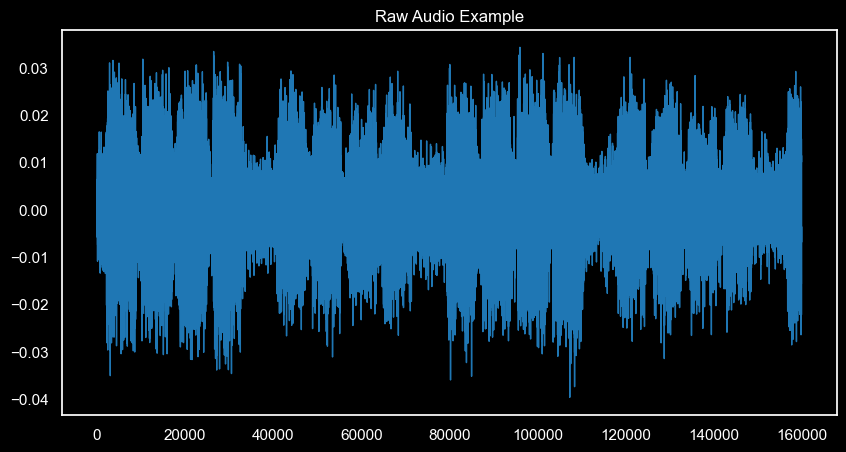

In [7]:
plt.style.use('dark_background')

pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

# Spectrogram sample
* Generate a mel one

# Spectrogram sample
* log spectogram 

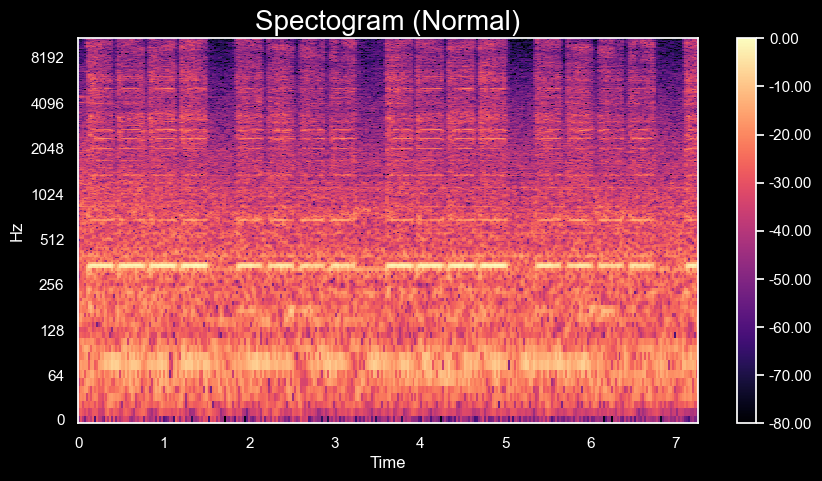

In [8]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram (Normal)', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

### Zoomed in view 100000 <-> 150000

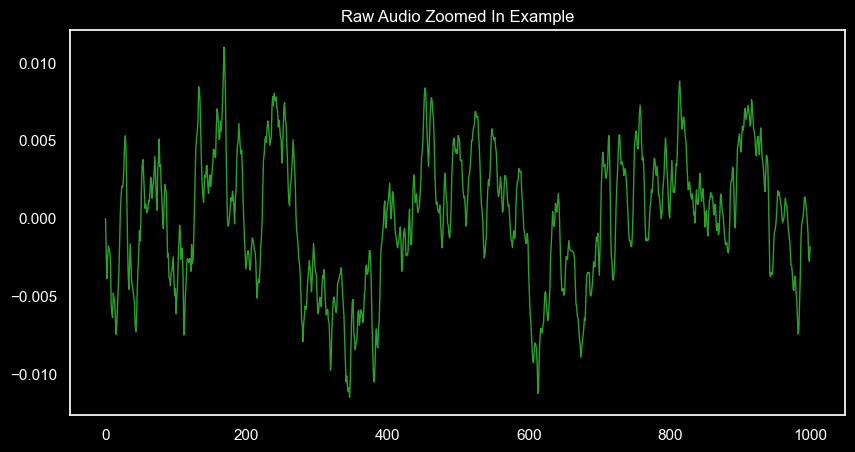

In [9]:
plt.style.use('dark_background')


pd.Series(y[149000:150000]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

# Create initial Dataframe

In [10]:
test = audio_files[0]
new = test.split('/')
print(new)

['', 'Users', 'jaimacabangon', 'Downloads', 'slider_0db', 'id_00', 'abnormal', '00000059.wav']


In [11]:
raw_data_list = [] 
sample_rate_list = []
sound_source_list = [] 
binary_classification_list = [] 
wav_file_list = [] 
name_classification_list = []

for audio_file in audio_files:
    split_string = str(audio_file).split('/')
    sound_source = split_string[4]
    name_classification = sound_source.split("_")[0]
    binary_classification = split_string[6]
    wav_file = split_string[7]
    raw_data, sample_rate = librosa.load(audio_file, sr=None)
    sound_source_list.append(sound_source)
    binary_classification_list.append(binary_classification)
    wav_file_list.append(wav_file)
    raw_data_list.append(raw_data)
    sample_rate_list.append(sample_rate)
    name_classification_list.append(name_classification)


    

### 50k samples average time to DF ~5mins

In [12]:
df = pd.DataFrame(columns=["Sound Source","Machine Type", "Classification", ".wav File", "Sample Rate", "Raw Data"])

In [13]:
df["Sound Source"] = sound_source_list
df["Machine Type"] = name_classification_list # label for machine type 
df["Classification"] = binary_classification_list # label for 0 or 1 (normal vs abnormal)
df[".wav File"] = wav_file_list
df["Sample Rate"] = sample_rate_list
df["Raw Data"] = raw_data_list

In [14]:
df.head()

Sound Source Machine Type Classification     .wav File  Sample Rate  \
0   slider_0db       slider       abnormal  00000059.wav        16000   
1   slider_0db       slider       abnormal  00000071.wav        16000   
2   slider_0db       slider       abnormal  00000065.wav        16000   
3   slider_0db       slider       abnormal  00000273.wav        16000   
4   slider_0db       slider       abnormal  00000267.wav        16000   

                                            Raw Data  
0  [-0.0057907104, -0.005340576, -0.0020980835, -...  
1  [0.000869751, 0.0002822876, 0.0035362244, -0.0...  
2  [-0.0036697388, -0.0024986267, -0.002040863, -...  
3  [-0.004398346, -0.0026435852, -0.00617218, -0....  
4  [0.0011329651, 0.0014266968, 0.0013427734, 0.0...

In [15]:
df['Mean'] = df['Raw Data'].apply(np.mean)

In [16]:
df['Standard Deviation'] = df['Raw Data'].apply(np.std)
# df['Max Value'] = df['Raw Data'].apply(np.max)
# df['Min Value'] = df['Raw Data'].apply(np.min) # comment out to reduce time

In [17]:
df.head()

Sound Source Machine Type Classification     .wav File  Sample Rate  \
0   slider_0db       slider       abnormal  00000059.wav        16000   
1   slider_0db       slider       abnormal  00000071.wav        16000   
2   slider_0db       slider       abnormal  00000065.wav        16000   
3   slider_0db       slider       abnormal  00000273.wav        16000   
4   slider_0db       slider       abnormal  00000267.wav        16000   

                                            Raw Data          Mean  \
0  [-0.0057907104, -0.005340576, -0.0020980835, -... -1.812935e-07   
1  [0.000869751, 0.0002822876, 0.0035362244, -0.0... -5.688906e-07   
2  [-0.0036697388, -0.0024986267, -0.002040863, -...  1.496291e-06   
3  [-0.004398346, -0.0026435852, -0.00617218, -0....  2.194882e-06   
4  [0.0011329651, 0.0014266968, 0.0013427734, 0.0...  1.301765e-06   

   Standard Deviation  Max Value  Min Value  
0            0.008589   0.034302  -0.039673  
1            0.008414   0.035927  -0.036274  
2            0.008477   0.034912  -0.036289  
3            0.008701   0.038101  -0.039494  
4            0.008667   0.035065  -0.036957

In [18]:
df.loc[0]

Sound Source                                                 slider_0db
Machine Type                                                     slider
Classification                                                 abnormal
.wav File                                                  00000059.wav
Sample Rate                                                       16000
Raw Data              [-0.0057907104, -0.005340576, -0.0020980835, -...
Mean                                                               -0.0
Standard Deviation                                             0.008589
Max Value                                                      0.034302
Min Value                                                     -0.039673
Name: 0, dtype: object

In [19]:
print(df["Classification"].value_counts(), "\n")
print(f'Raw data shape: {y.shape}')

Classification
normal      44157
abnormal     9900
Name: count, dtype: int64 

Raw data shape: (160000,)


Audio distribution
* normal    ->  44157
* abnormal   -> 9900

In [20]:
df["Sound Source"].value_counts()

Sound Source
fan_0db        5550
fan_-6db       5550
fan_6db        5550
pump_0db       4205
pump_-6db      4205
pump_6db       4205
valve_0db      4170
valve_-6db     4170
valve_6db      4170
slider_0db     4094
slider_6db     4094
slider_-6db    4094
Name: count, dtype: int64

In [21]:
df.describe()

Sample Rate          Mean  Standard Deviation     Max Value  \
count      54057.0  5.405700e+04        54057.000000  54057.000000   
mean       16000.0 -5.223209e-07            0.006701      0.040859   
std            0.0  2.210885e-06            0.002568      0.021243   
min        16000.0 -1.579688e-05            0.001229      0.008251   
25%        16000.0 -1.623869e-06            0.004759      0.024479   
50%        16000.0 -3.936291e-07            0.005928      0.036259   
75%        16000.0  6.347418e-07            0.009394      0.049431   
max        16000.0  1.468542e-05            0.021928      0.380241   

          Min Value  
count  54057.000000  
mean      -0.038830  
std        0.018196  
min       -0.542221  
25%       -0.047680  
50%       -0.036591  
75%       -0.024467  
max       -0.007732

In [22]:
df["Classification"].describe()

count      54057
unique         2
top       normal
freq       44157
Name: Classification, dtype: object

### Data taken at consistent sample rate of 16000
### Abnormal vs normal samples are not 50:50
#### Normal % = .3%
#### Abnormal % =18.3%


### Given Sample rate is consistent, reducing sample rate is not recommended as we could lose audio quality. 

In [23]:
df["Classification"] == "abnormal"

0         True
1         True
2         True
3         True
4         True
         ...  
54052    False
54053    False
54054    False
54055    False
54056    False
Name: Classification, Length: 54057, dtype: bool

In [24]:
df.loc[0]

Sound Source                                                 slider_0db
Machine Type                                                     slider
Classification                                                 abnormal
.wav File                                                  00000059.wav
Sample Rate                                                       16000
Raw Data              [-0.0057907104, -0.005340576, -0.0020980835, -...
Mean                                                               -0.0
Standard Deviation                                             0.008589
Max Value                                                      0.034302
Min Value                                                     -0.039673
Name: 0, dtype: object

In [25]:
df.loc[4089]

Sound Source                                                 slider_0db
Machine Type                                                     slider
Classification                                                   normal
.wav File                                                  00000068.wav
Sample Rate                                                       16000
Raw Data              [0.00806427, 0.0070648193, 0.005378723, 0.0054...
Mean                                                          -0.000001
Standard Deviation                                             0.007037
Max Value                                                      0.027077
Min Value                                                     -0.027336
Name: 4089, dtype: object

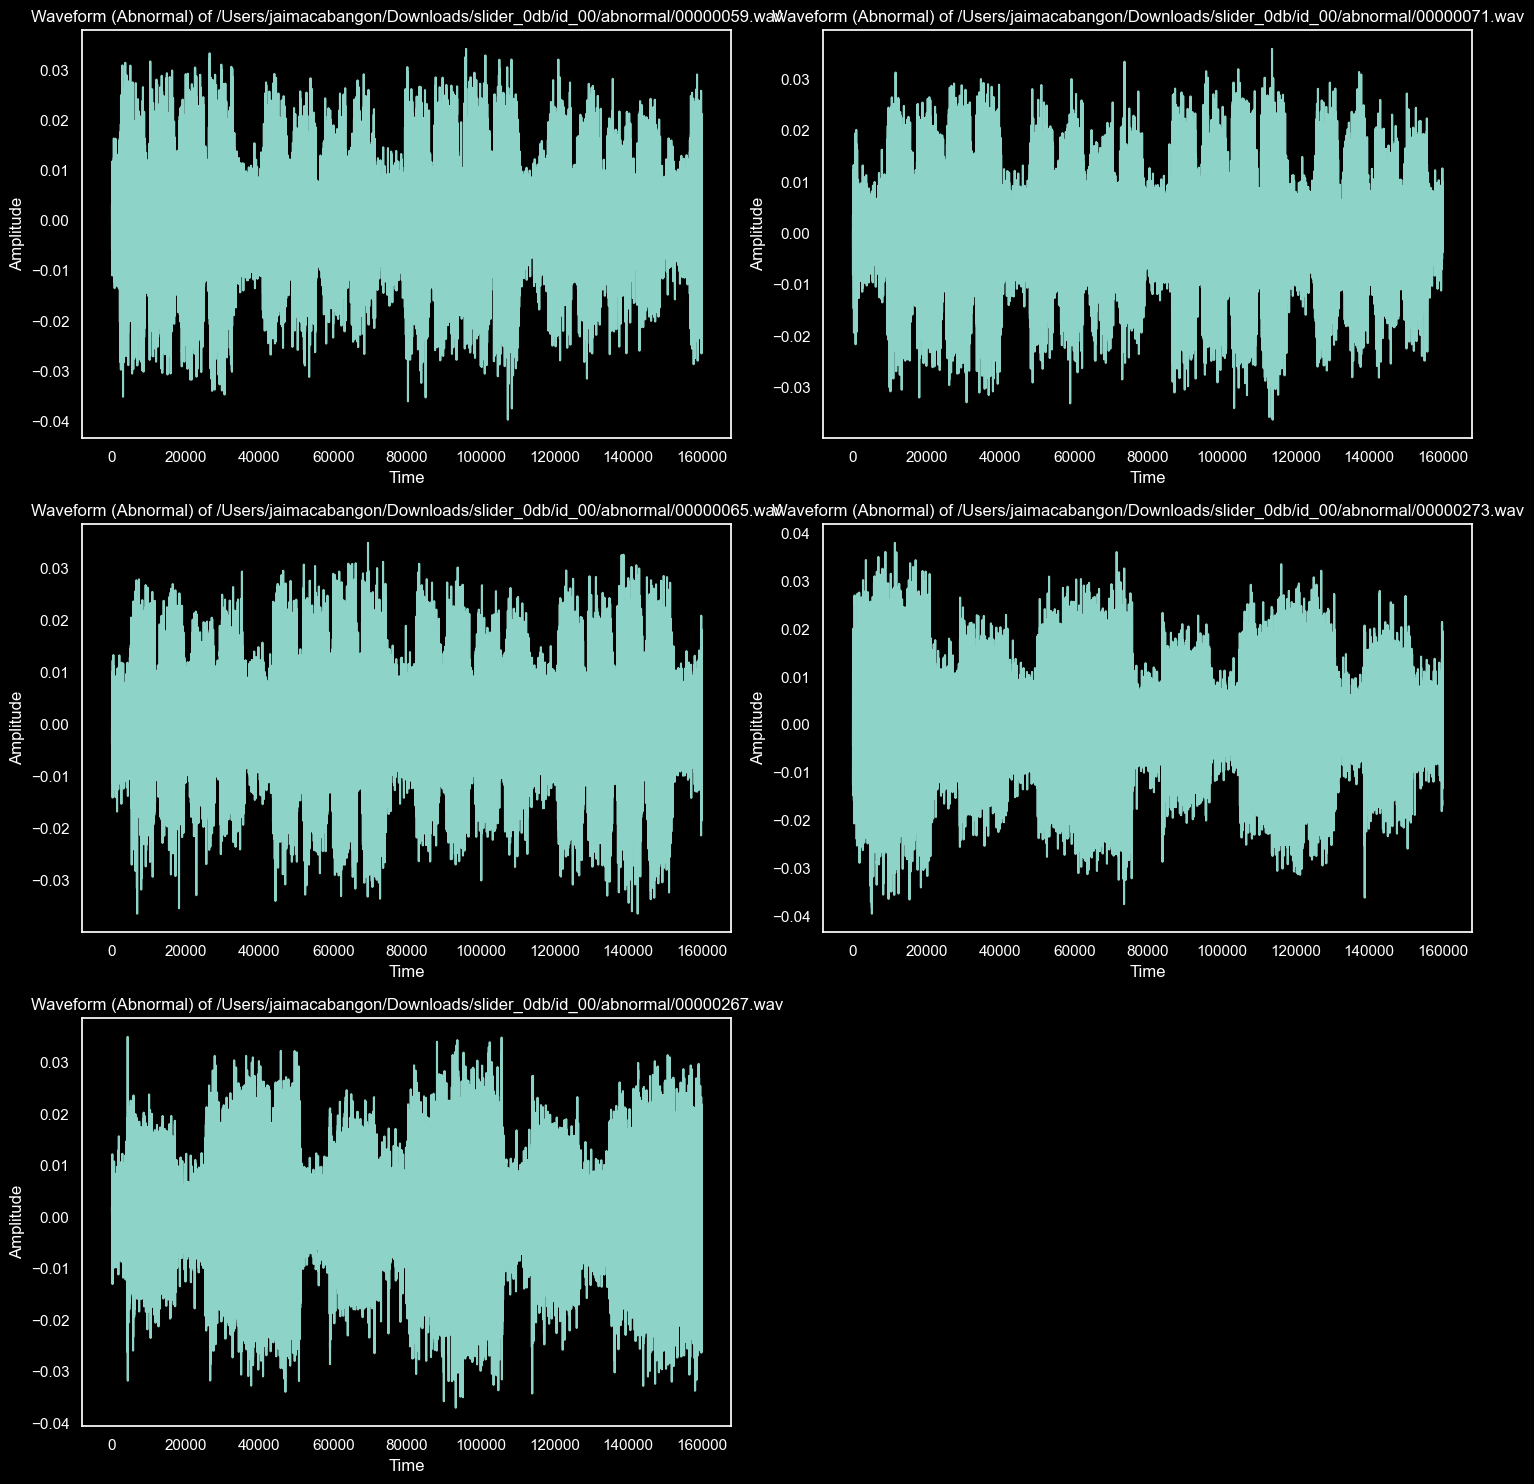

In [26]:
# Number of audio files
num_files = len(audio_files[0:5])

# Calculate the number of rows and columns for subplots
rows = (num_files + 1) // 2
cols = 2

plt.style.use('dark_background')

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over the audio files and plot each one
for i, file in enumerate(audio_files[0:5]):
    # Load the audio file
    y, sample_rate = librosa.load(file, sr=None)
    
    # Plot the waveform
    axs[i].plot(y)
    axs[i].set_title(f'Waveform (Abnormal) of {file}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude')

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

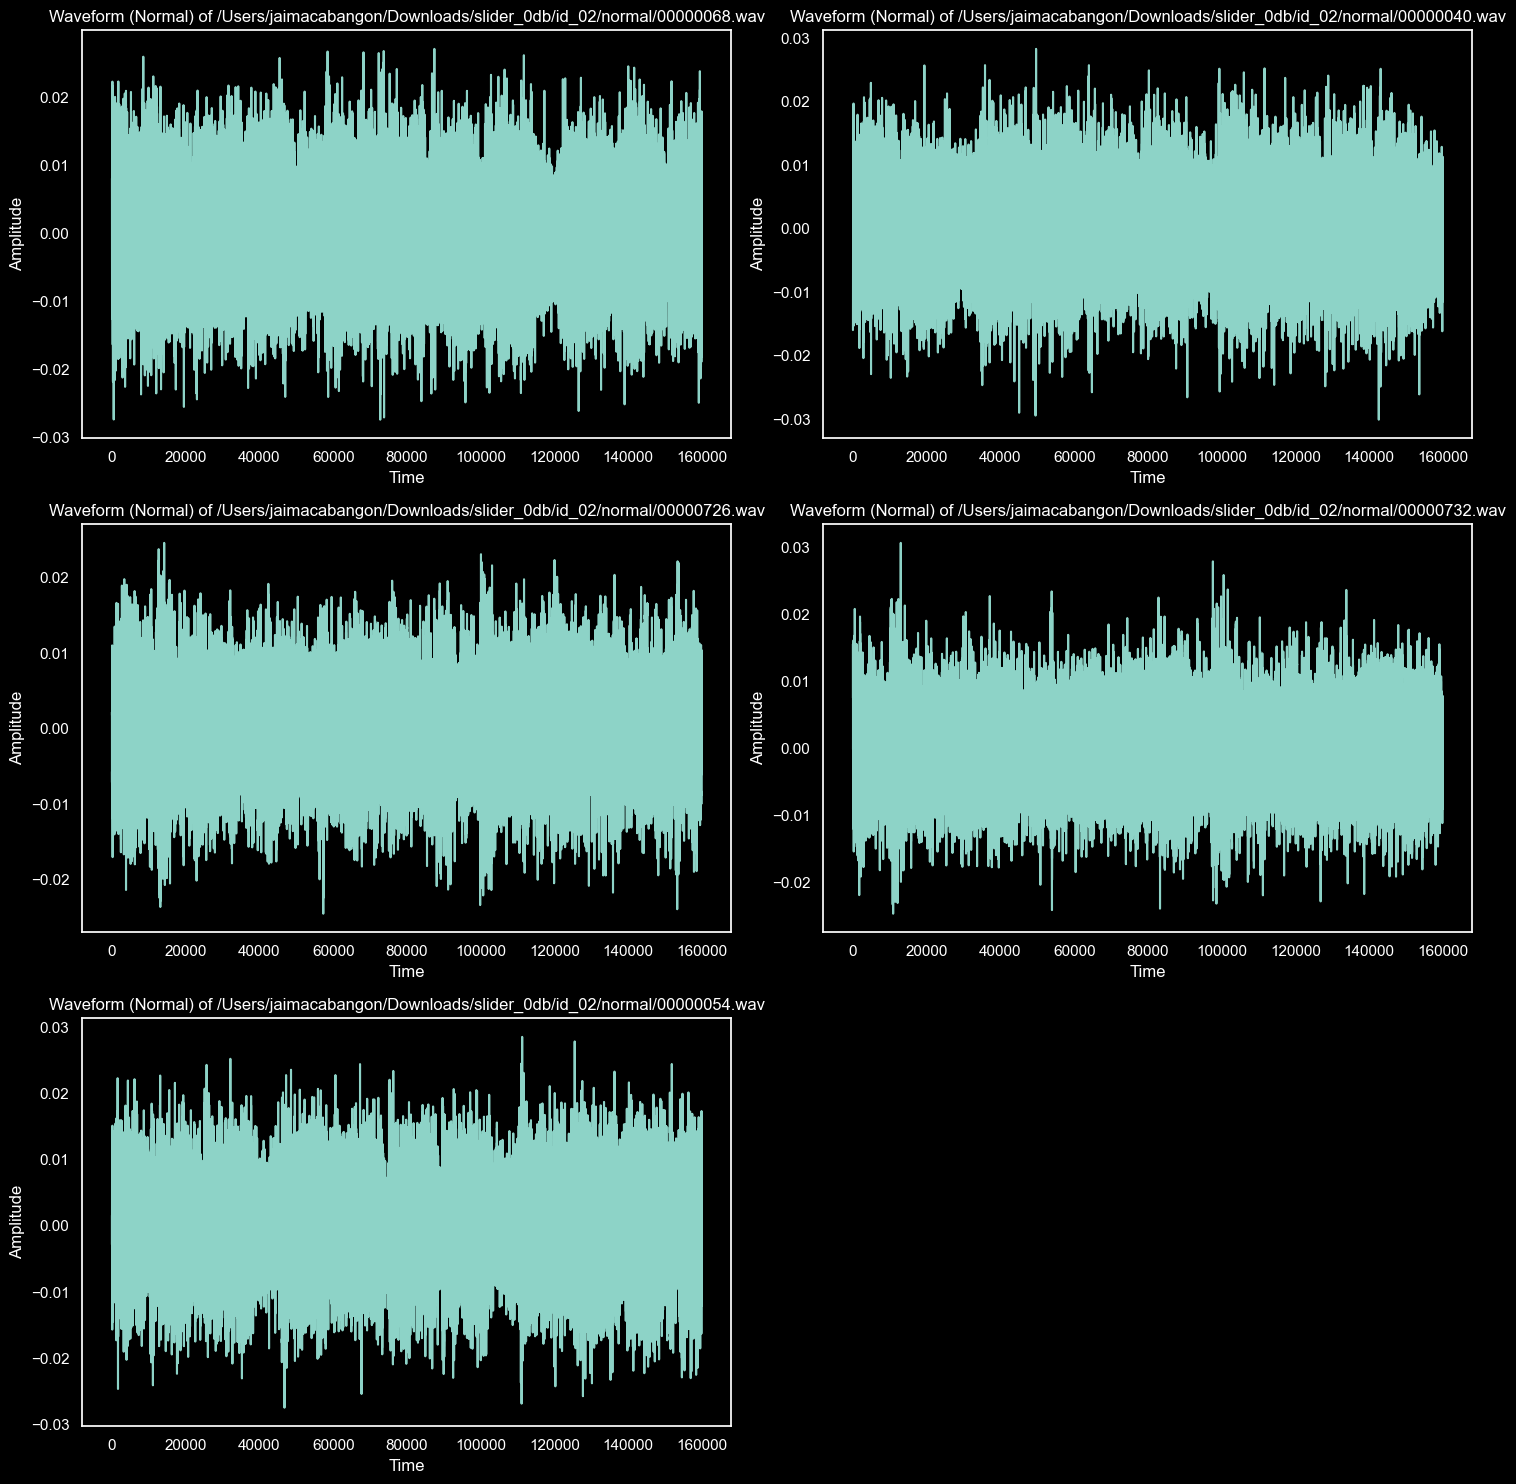

In [27]:
# Number of audio files
num_files = len(audio_files[4089:4094])

# Calculate the number of rows and columns for subplots
rows = (num_files + 1) // 2
cols = 2

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten the axs array for easier iteration
axs = axs.flatten()
plt.style.use('dark_background')


# Iterate over the audio files and plot each one
for i, file in enumerate(audio_files[4089:4094]):
    # Load the audio file
    y, sample_rate = librosa.load(file, sr=None)
    
    # Plot the waveform
    axs[i].plot(y)
    axs[i].set_title(f'Waveform (Normal) of {file}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Amplitude')

# Hide any empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

# RMS AND ZCR Calculations

In [28]:
def calculate_rms(signal):
    """Calculate RMS power of the signal."""
    return np.sqrt(np.mean(np.square(signal)))

def calculate_zero_crossing_rate(signal):
    """Calculate zero-crossing rate of the signal."""
    return np.mean(librosa.zero_crossings(signal, pad=False))

In [29]:
df.head()

Sound Source Machine Type Classification     .wav File  Sample Rate  \
0   slider_0db       slider       abnormal  00000059.wav        16000   
1   slider_0db       slider       abnormal  00000071.wav        16000   
2   slider_0db       slider       abnormal  00000065.wav        16000   
3   slider_0db       slider       abnormal  00000273.wav        16000   
4   slider_0db       slider       abnormal  00000267.wav        16000   

                                            Raw Data          Mean  \
0  [-0.0057907104, -0.005340576, -0.0020980835, -... -1.812935e-07   
1  [0.000869751, 0.0002822876, 0.0035362244, -0.0... -5.688906e-07   
2  [-0.0036697388, -0.0024986267, -0.002040863, -...  1.496291e-06   
3  [-0.004398346, -0.0026435852, -0.00617218, -0....  2.194882e-06   
4  [0.0011329651, 0.0014266968, 0.0013427734, 0.0...  1.301765e-06   

   Standard Deviation  Max Value  Min Value  
0            0.008589   0.034302  -0.039673  
1            0.008414   0.035927  -0.036274  
2            0.008477   0.034912  -0.036289  
3            0.008701   0.038101  -0.039494  
4            0.008667   0.035065  -0.036957

In [30]:
df["RMS"] = df["Raw Data"].apply(calculate_rms)
df["ZCR"] = df["Raw Data"].apply(calculate_zero_crossing_rate)

In [31]:
df

Sound Source Machine Type Classification     .wav File  Sample Rate  \
0       slider_0db       slider       abnormal  00000059.wav        16000   
1       slider_0db       slider       abnormal  00000071.wav        16000   
2       slider_0db       slider       abnormal  00000065.wav        16000   
3       slider_0db       slider       abnormal  00000273.wav        16000   
4       slider_0db       slider       abnormal  00000267.wav        16000   
...            ...          ...            ...           ...          ...   
54052    valve_6db        valve         normal  00000083.wav        16000   
54053    valve_6db        valve         normal  00000097.wav        16000   
54054    valve_6db        valve         normal  00000068.wav        16000   
54055    valve_6db        valve         normal  00000040.wav        16000   
54056    valve_6db        valve         normal  00000054.wav        16000   

                                                Raw Data          Mean  \
0      [-0.0057907104, -0.005340576, -0.0020980835, -... -1.812935e-07   
1      [0.000869751, 0.0002822876, 0.0035362244, -0.0... -5.688906e-07   
2      [-0.0036697388, -0.0024986267, -0.002040863, -...  1.496291e-06   
3      [-0.004398346, -0.0026435852, -0.00617218, -0....  2.194882e-06   
4      [0.0011329651, 0.0014266968, 0.0013427734, 0.0...  1.301765e-06   
...                                                  ...           ...   
54052  [-0.0015220642, -0.0024032593, -0.0027389526, ... -5.024433e-07   
54053  [-0.0033035278, -0.0030288696, -0.0026435852, ... -7.680654e-07   
54054  [-0.0005912781, -1.9073486e-05, 0.00062179565,... -1.894951e-06   
54055  [-0.00061035156, -0.0008201599, -0.00074768066... -8.237124e-07   
54056  [-0.0022010803, -0.0014953613, -0.00020980835,... -7.374287e-08   

       Standard Deviation  Max Value  Min Value       RMS       ZCR  
0                0.008589   0.034302  -0.039673  0.008589  0.096650  
1                0.008414   0.035927  -0.036274  0.008414  0.081594  
2                0.008477   0.034912  -0.036289  0.008477  0.092031  
3                0.008701   0.038101  -0.039494  0.008701  0.084450  
4                0.008667   0.035065  -0.036957  0.008667  0.083056  
...                   ...        ...        ...       ...       ...  
54052            0.002885   0.060036  -0.052261  0.002885  0.075869  
54053            0.002791   0.062965  -0.068096  0.002791  0.071919  
54054            0.002421   0.064182  -0.054520  0.002421  0.259650  
54055            0.002947   0.058903  -0.061409  0.002948  0.064181  
54056            0.002823   0.057983  -0.050571  0.002823  0.080881  

[54057 rows x 12 columns]

In [32]:
df.describe()

Sample Rate          Mean  Standard Deviation     Max Value  \
count      54057.0  5.405700e+04        54057.000000  54057.000000   
mean       16000.0 -5.223209e-07            0.006701      0.040859   
std            0.0  2.210885e-06            0.002568      0.021243   
min        16000.0 -1.579688e-05            0.001229      0.008251   
25%        16000.0 -1.623869e-06            0.004759      0.024479   
50%        16000.0 -3.936291e-07            0.005928      0.036259   
75%        16000.0  6.347418e-07            0.009394      0.049431   
max        16000.0  1.468542e-05            0.021928      0.380241   

          Min Value           RMS           ZCR  
count  54057.000000  54057.000000  54057.000000  
mean      -0.038830      0.006701      0.096058  
std        0.018196      0.002568      0.040087  
min       -0.542221      0.001229      0.011756  
25%       -0.047680      0.004759      0.069200  
50%       -0.036591      0.005928      0.089056  
75%       -0.024467      0.009394      0.112219  
max       -0.007732      0.021928      0.390575

# Total distribution of RMS/ZCR calculation 

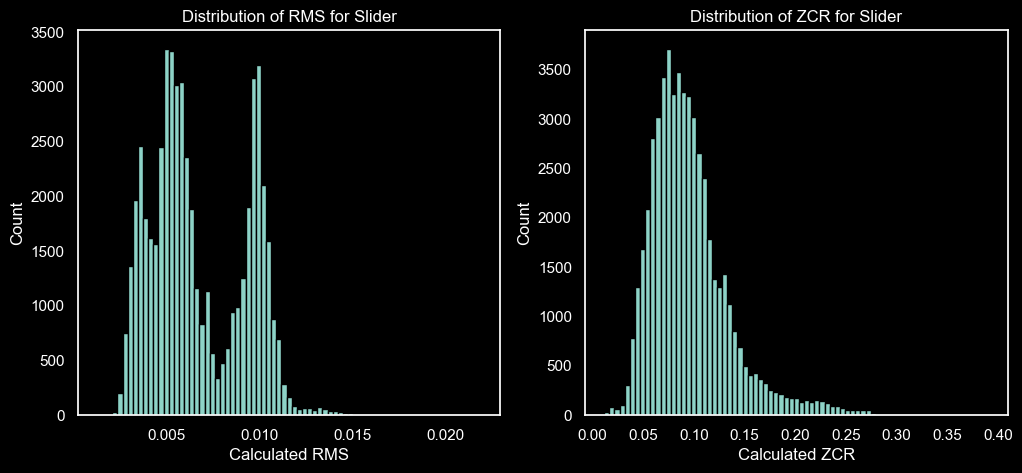

In [33]:
# Create a histogram with matplotlib
# plt.hist(df['RMS'], bins=75, edgecolor='black')
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.style.use('dark_background')

# # # Customize the plot
# # plt.xlabel('RMS')
# # plt.ylabel('Count')
# plt.title('Distribution of RMS for 0db Slider')

axs[0].hist(df['RMS'], bins=75, edgecolor='black')
axs[0].set_title('Distribution of RMS for Slider')
axs[0].set_xlabel('Calculated RMS')
axs[0].set_ylabel('Count')

# Histogram for column2
axs[1].hist(df['ZCR'], bins=75, edgecolor='black')
axs[1].set_title('Distribution of ZCR for Slider')
axs[1].set_xlabel('Calculated ZCR')
axs[1].set_ylabel('Count')


# Show the plot
plt.show()

### Breakdown Dataset 

In [34]:
# slider_0db     4094
# slider_-6db    4094

normal_classification = df['Classification'] == 'normal'
abnormal_classification = df['Classification'] == 'abnormal'

source_0_db = df['Sound Source'] == 'slider_0db'
source_minus_6_db = df['Sound Source'] == 'slider_-6db'
source_6_db = df['Sound Source'] == 'slider_6db'


# 0dB filter
normal_filtered_df_0_db = df[normal_classification & source_0_db]
abnormal_filtered_df_0_db = df[abnormal_classification & source_0_db]

# -6dB filter
normal_filtered_df_minus_6_db = df[normal_classification & source_minus_6_db]
abnormal_filtered_df_minus_6_db = df[abnormal_classification & source_minus_6_db]


# 6dB filter
normal_filtered_df_6_db = df[normal_classification & source_6_db]
abnormal_filtered_df_6_db = df[abnormal_classification & source_6_db]

# Normal sound RMS/ZCR distribution
## Indicates lower calculated RMS values most of the samples are around the .0050 -> .0060
### Have to be careful 

# Normal sound distribution (-6dB,0dB)

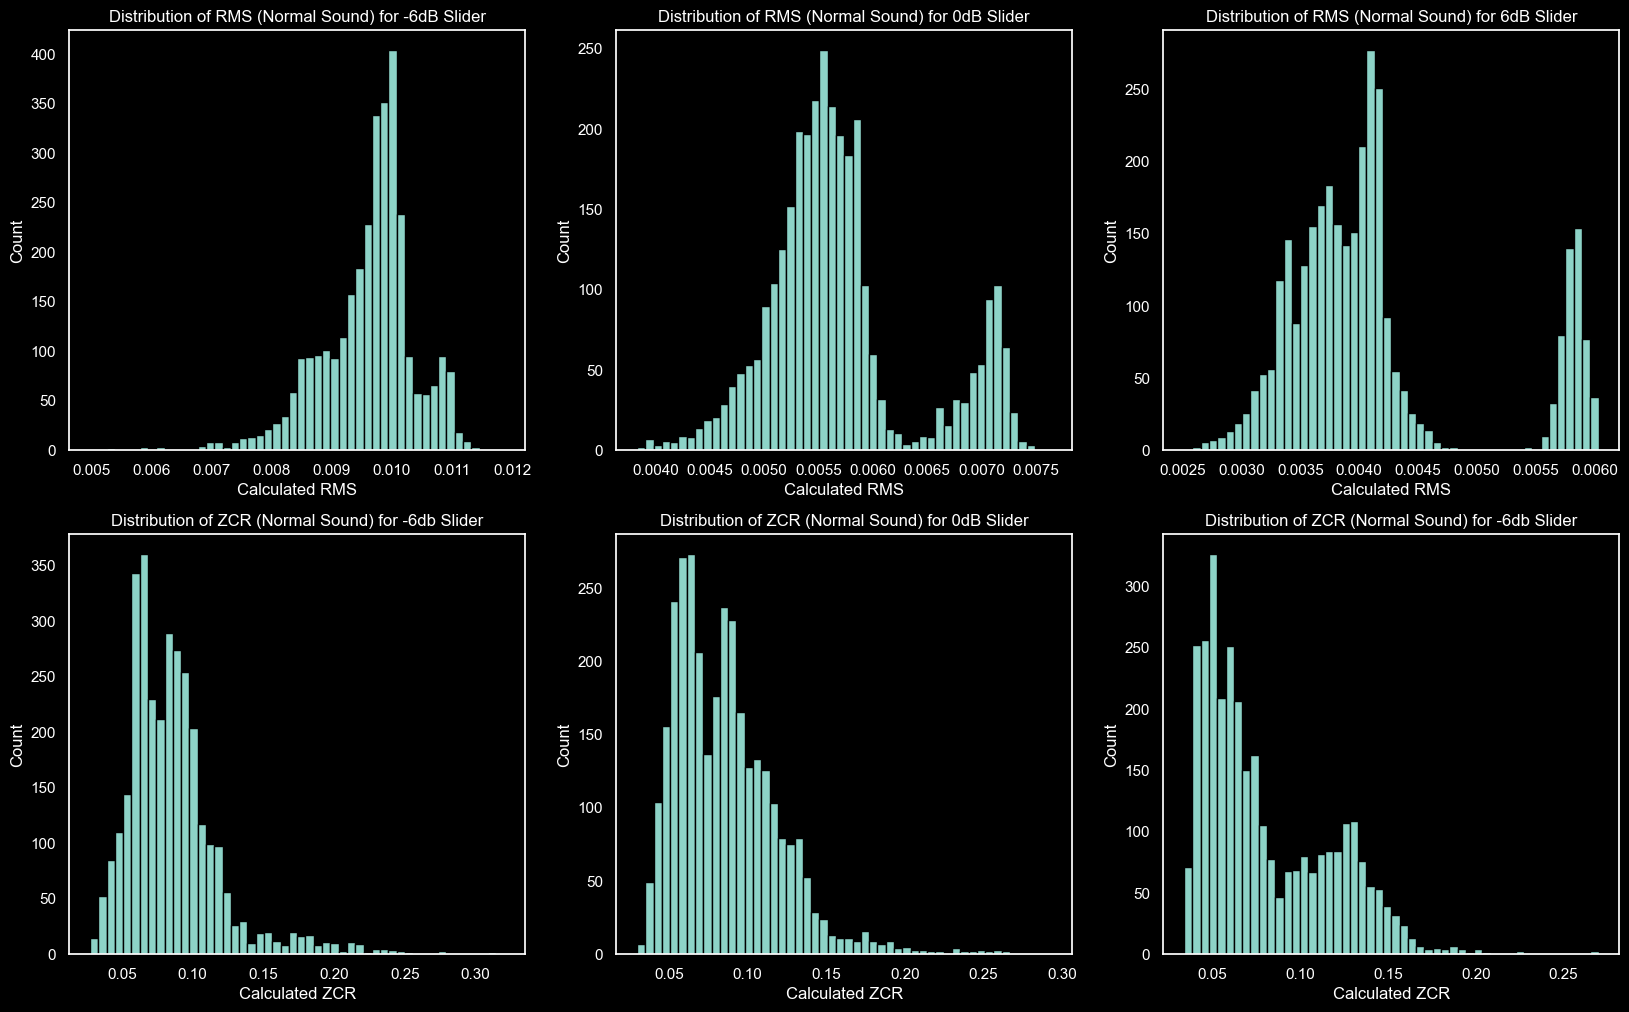

In [35]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

plt.style.use('dark_background')


axs[0,0].hist(normal_filtered_df_minus_6_db['RMS'], bins=50, edgecolor='black')
axs[0,0].set_title('Distribution of RMS (Normal Sound) for -6dB Slider')
axs[0,0].set_xlabel('Calculated RMS')
axs[0,0].set_ylabel('Count')


axs[0,1].hist(normal_filtered_df_0_db['RMS'], bins=50, edgecolor='black')
axs[0,1].set_title('Distribution of RMS (Normal Sound) for 0dB Slider')
axs[0,1].set_xlabel('Calculated RMS')
axs[0,1].set_ylabel('Count')

axs[0,2].hist(normal_filtered_df_6_db['RMS'], bins=50, edgecolor='black')
axs[0,2].set_title('Distribution of RMS (Normal Sound) for 6dB Slider')
axs[0,2].set_xlabel('Calculated RMS')
axs[0,2].set_ylabel('Count')


# Histogram for column2
axs[1,0].hist(normal_filtered_df_minus_6_db['ZCR'], bins=50, edgecolor='black')
axs[1,0].set_title('Distribution of ZCR (Normal Sound) for -6db Slider')
axs[1,0].set_xlabel('Calculated ZCR')
axs[1,0].set_ylabel('Count')


# Histogram for column2
axs[1,1].hist(normal_filtered_df_0_db['ZCR'], bins=50, edgecolor='black')
axs[1,1].set_title('Distribution of ZCR (Normal Sound) for 0dB Slider')
axs[1,1].set_xlabel('Calculated ZCR')
axs[1,1].set_ylabel('Count')



# Histogram for column2
axs[1,2].hist(normal_filtered_df_6_db['ZCR'], bins=50, edgecolor='black')
axs[1,2].set_title('Distribution of ZCR (Normal Sound) for -6db Slider')
axs[1,2].set_xlabel('Calculated ZCR')
axs[1,2].set_ylabel('Count')



# Show the plot
plt.show()

In [36]:
normal_filtered_df_0_db.describe()

Sample Rate          Mean  Standard Deviation    Max Value  \
count       3204.0  3.204000e+03         3204.000000  3204.000000   
mean       16000.0 -2.580264e-07            0.005690     0.028047   
std            0.0  1.877517e-06            0.000690     0.004400   
min        16000.0 -8.192658e-06            0.003831     0.018883   
25%        16000.0 -1.420730e-06            0.005283     0.024942   
50%        16000.0 -2.526999e-07            0.005566     0.027178   
75%        16000.0  8.759439e-07            0.005870     0.030403   
max        16000.0  7.554817e-06            0.007642     0.061607   

         Min Value          RMS          ZCR  
count  3204.000000  3204.000000  3204.000000  
mean     -0.027615     0.005690     0.086298  
std       0.004576     0.000690     0.034014  
min      -0.064255     0.003831     0.029531  
25%      -0.029767     0.005283     0.060780  
50%      -0.026642     0.005566     0.081753  
75%      -0.024222     0.005870     0.104509  
max      -0.019146     0.007642     0.293363

In [37]:
normal_filtered_df_minus_6_db.describe()

Sample Rate          Mean  Standard Deviation    Max Value  \
count       3204.0  3.204000e+03         3204.000000  3204.000000   
mean       16000.0 -3.899886e-07            0.009616     0.043157   
std            0.0  3.004413e-06            0.000773     0.006817   
min        16000.0 -1.263738e-05            0.004982     0.025665   
25%        16000.0 -2.095437e-06            0.009239     0.039595   
50%        16000.0 -2.931357e-07            0.009752     0.042187   
75%        16000.0  1.432133e-06            0.010055     0.045275   
max        16000.0  1.086173e-05            0.011870     0.163696   

         Min Value          RMS          ZCR  
count  3204.000000  3204.000000  3204.000000  
mean     -0.043108     0.009616     0.086446  
std       0.006683     0.000773     0.035460  
min      -0.147530     0.004982     0.027356  
25%      -0.045235     0.009239     0.063222  
50%      -0.042097     0.009752     0.081266  
75%      -0.039489     0.010055     0.098589  
max      -0.027103     0.011870     0.320412

In [38]:
normal_filtered_df_6_db.describe()

Sample Rate          Mean  Standard Deviation    Max Value  \
count       3204.0  3.204000e+03         3204.000000  3204.000000   
mean       16000.0 -1.990106e-07            0.004135     0.023241   
std            0.0  1.467181e-06            0.000825     0.004723   
min        16000.0 -5.538177e-06            0.002512     0.015156   
25%        16000.0 -1.074743e-06            0.003605     0.019268   
50%        16000.0 -2.033472e-07            0.003960     0.022848   
75%        16000.0  7.001102e-07            0.004196     0.025640   
max        16000.0  5.945086e-06            0.006035     0.041607   

         Min Value          RMS          ZCR  
count  3204.000000  3204.000000  3204.000000  
mean     -0.022261     0.004135     0.080837  
std       0.004946     0.000825     0.036628  
min      -0.043396     0.002512     0.033763  
25%      -0.024537     0.003605     0.050853  
50%      -0.020889     0.003960     0.067656  
75%      -0.018452     0.004196     0.109825  
max      -0.015331     0.006035     0.269906

# Abnormal sound RMS/ZCR distribution

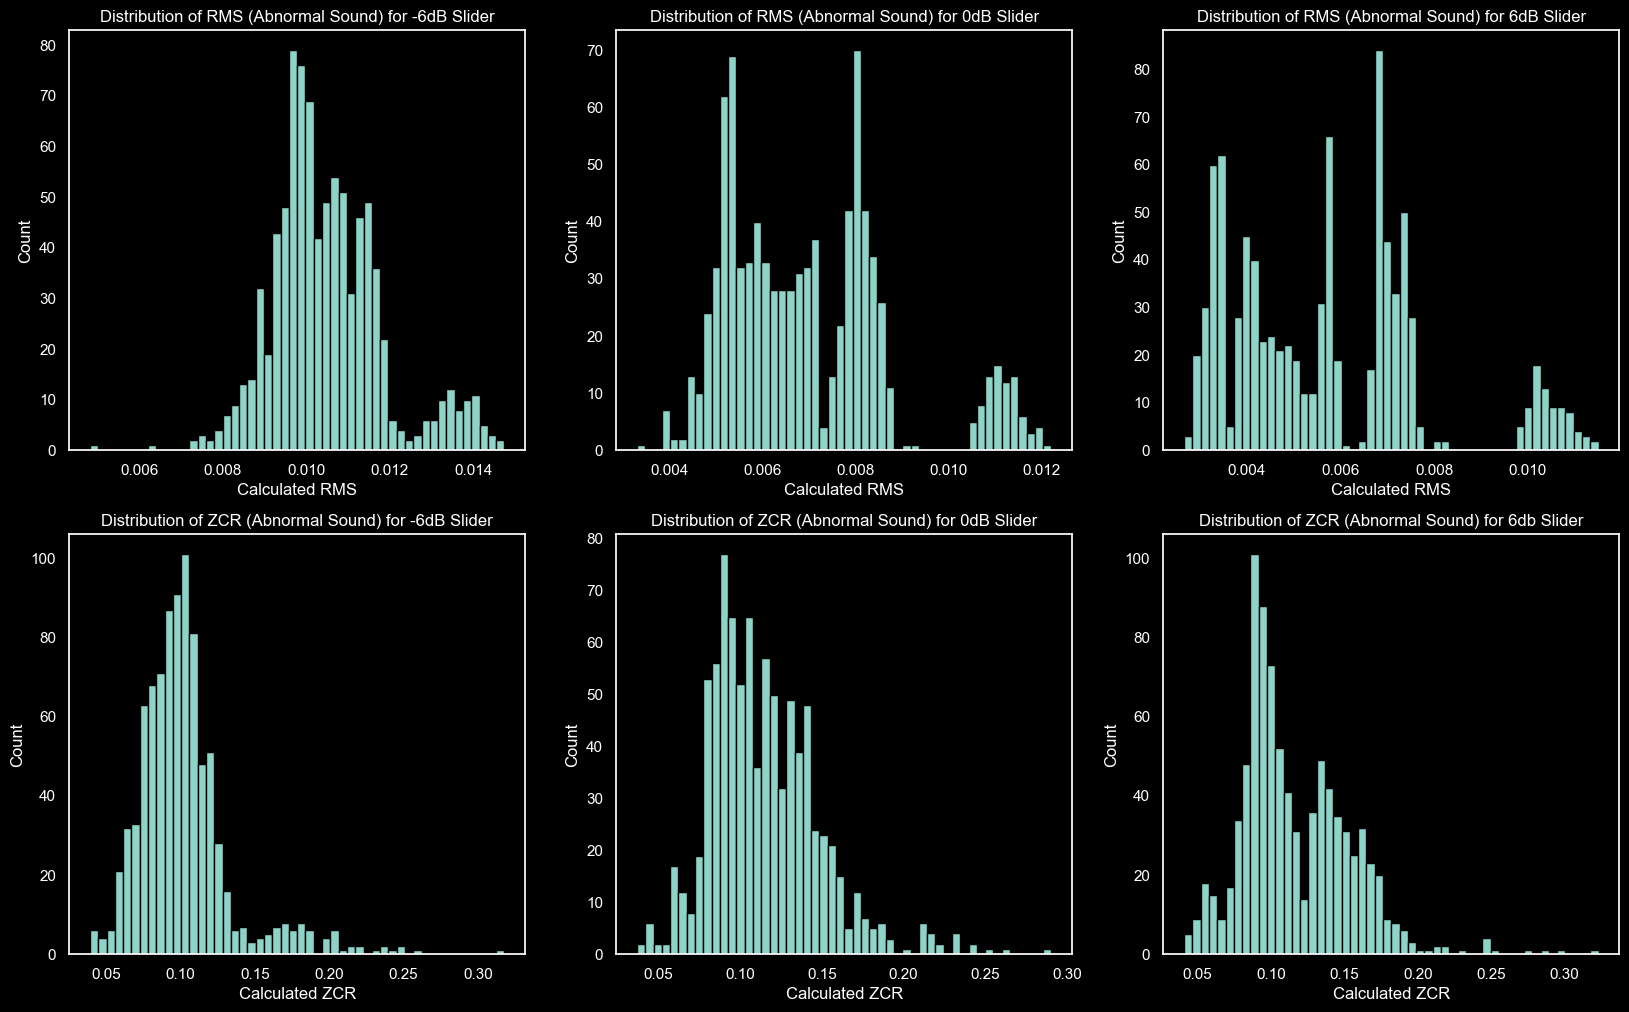

In [39]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))

plt.style.use('dark_background')

axs[0,0].hist(abnormal_filtered_df_minus_6_db['RMS'], bins=50, edgecolor='black')
axs[0,0].set_title('Distribution of RMS (Abnormal Sound) for -6dB Slider')
axs[0,0].set_xlabel('Calculated RMS')
axs[0,0].set_ylabel('Count')

axs[0,1].hist(abnormal_filtered_df_0_db['RMS'], bins=50, edgecolor='black')
axs[0,1].set_title('Distribution of RMS (Abnormal Sound) for 0dB Slider')
axs[0,1].set_xlabel('Calculated RMS')
axs[0,1].set_ylabel('Count')

axs[0,2].hist(abnormal_filtered_df_6_db['RMS'], bins=50, edgecolor='black')
axs[0,2].set_title('Distribution of RMS (Abnormal Sound) for 6dB Slider')
axs[0,2].set_xlabel('Calculated RMS')
axs[0,2].set_ylabel('Count')


axs[1,0].hist(abnormal_filtered_df_minus_6_db['ZCR'], bins=50, edgecolor='black')
axs[1,0].set_title('Distribution of ZCR (Abnormal Sound) for -6dB Slider')
axs[1,0].set_xlabel('Calculated ZCR')
axs[1,0].set_ylabel('Count')


# Histogram for column2
axs[1,1].hist(abnormal_filtered_df_0_db['ZCR'], bins=50, edgecolor='black')
axs[1,1].set_title('Distribution of ZCR (Abnormal Sound) for 0dB Slider')
axs[1,1].set_xlabel('Calculated ZCR')
axs[1,1].set_ylabel('Count')


# Histogram for column2
axs[1,2].hist(abnormal_filtered_df_6_db['ZCR'], bins=50, edgecolor='black')
axs[1,2].set_title('Distribution of ZCR (Abnormal Sound) for 6db Slider')
axs[1,2].set_xlabel('Calculated ZCR')
axs[1,2].set_ylabel('Count')



# Show the plot
plt.show()

# ***Something to note is that RMS distribution overall for abnormal sound is higher, which could indicate that those are the abnormal sound signals we want to predict


In [40]:
abnormal_filtered_df_0_db.describe()

Sample Rate          Mean  Standard Deviation   Max Value   Min Value  \
count        890.0  8.900000e+02          890.000000  890.000000  890.000000   
mean       16000.0 -2.923874e-07            0.006967    0.034485   -0.035093   
std            0.0  1.751711e-06            0.001794    0.010920    0.011767   
min        16000.0 -6.369686e-06            0.003309    0.016510   -0.075378   
25%        16000.0 -1.350677e-06            0.005447    0.027067   -0.038500   
50%        16000.0 -2.001762e-07            0.006702    0.032784   -0.032734   
75%        16000.0  8.264065e-07            0.008026    0.037616   -0.027038   
max        16000.0  4.964590e-06            0.012207    0.070686   -0.018921   

              RMS         ZCR  
count  890.000000  890.000000  
mean     0.006967    0.114586  
std      0.001794    0.033711  
min      0.003309    0.036850  
25%      0.005447    0.090822  
50%      0.006702    0.108916  
75%      0.008025    0.133934  
max      0.012207    0.290525

In [41]:
abnormal_filtered_df_minus_6_db.describe()

Sample Rate          Mean  Standard Deviation   Max Value   Min Value  \
count        890.0  8.900000e+02          890.000000  890.000000  890.000000   
mean       16000.0 -4.244725e-07            0.010496    0.048183   -0.049015   
std            0.0  2.884551e-06            0.001352    0.009383    0.010285   
min        16000.0 -1.049416e-05            0.004822    0.029194   -0.095448   
25%        16000.0 -1.981449e-06            0.009654    0.042327   -0.051712   
50%        16000.0 -3.185392e-07            0.010290    0.046202   -0.046772   
75%        16000.0  1.206595e-06            0.011257    0.050466   -0.042378   
max        16000.0  1.141078e-05            0.014740    0.084290   -0.030670   

              RMS         ZCR  
count  890.000000  890.000000  
mean     0.010496    0.102190  
std      0.001352    0.032072  
min      0.004822    0.039069  
25%      0.009654    0.082583  
50%      0.010290    0.098022  
75%      0.011257    0.111892  
max      0.014740    0.317900

In [42]:
abnormal_filtered_df_6_db.describe()

Sample Rate          Mean  Standard Deviation   Max Value   Min Value  \
count        890.0  8.900000e+02          890.000000  890.000000  890.000000   
mean       16000.0 -1.937530e-07            0.005713    0.029621   -0.029957   
std            0.0  1.365292e-06            0.002089    0.011379    0.012286   
min        16000.0 -5.493212e-06            0.002669    0.012993   -0.079712   
25%        16000.0 -9.599983e-07            0.003983    0.021697   -0.033707   
50%        16000.0 -2.068281e-07            0.005627    0.027834   -0.027212   
75%        16000.0  5.968034e-07            0.006979    0.032366   -0.021440   
max        16000.0  5.067801e-06            0.011508    0.067890   -0.013416   

              RMS         ZCR  
count  890.000000  890.000000  
mean     0.005713    0.115771  
std      0.002089    0.037346  
min      0.002669    0.040850  
25%      0.003983    0.089317  
50%      0.005627    0.105859  
75%      0.006979    0.140595  
max      0.011508    0.323169

# Calculate percentage difference between mean normal RMS/ZCR and mean abnormal RMS/ZCR

$$\text{Percentage Difference} = \left| \frac{\text{abnormal RMS/ZCR} - \text{normal RMS/ZCR}}{\text{normal RMS/ZCR}} \right| \times 100$$



# Results (-6dB Slider)

|  |Normal |  Abnormal | Percent Difference 
| :--------------| :---------:|:---------:|:---------:|
| ZMS Mean  |0.009614 | 0.010491 | 9.1%
| ZCR Mean  |0.064470| 0.076893 | 19.2%

# Results (0dB Slider)

|  |Normal |  Abnormal | Percent Difference 
| :--------------| :---------:|:---------:|:---------:|
| ZMS Mean  |0.005687 | 0.006960 | 22.3%
| ZCR Mean  |0.064451| 0.086448 | 34%


# Results (6dB Slider)

|  |Normal |  Abnormal | Percent Difference 
| :--------------| :---------:|:---------:|:---------:|
| ZMS Mean  |0.004132| 0.005705| 38.0%
| ZCR Mean  |0.060384| 0.087477 | 44.86%







In [43]:
df.head()

Sound Source Machine Type Classification     .wav File  Sample Rate  \
0   slider_0db       slider       abnormal  00000059.wav        16000   
1   slider_0db       slider       abnormal  00000071.wav        16000   
2   slider_0db       slider       abnormal  00000065.wav        16000   
3   slider_0db       slider       abnormal  00000273.wav        16000   
4   slider_0db       slider       abnormal  00000267.wav        16000   

                                            Raw Data          Mean  \
0  [-0.0057907104, -0.005340576, -0.0020980835, -... -1.812935e-07   
1  [0.000869751, 0.0002822876, 0.0035362244, -0.0... -5.688906e-07   
2  [-0.0036697388, -0.0024986267, -0.002040863, -...  1.496291e-06   
3  [-0.004398346, -0.0026435852, -0.00617218, -0....  2.194882e-06   
4  [0.0011329651, 0.0014266968, 0.0013427734, 0.0...  1.301765e-06   

   Standard Deviation  Max Value  Min Value       RMS       ZCR  
0            0.008589   0.034302  -0.039673  0.008589  0.096650  
1            0.008414   0.035927  -0.036274  0.008414  0.081594  
2            0.008477   0.034912  -0.036289  0.008477  0.092031  
3            0.008701   0.038101  -0.039494  0.008701  0.084450  
4            0.008667   0.035065  -0.036957  0.008667  0.083056

In [44]:
sound_sources = df.groupby('Sound Source').agg(
    rms_mean=('RMS', 'mean'), # aggregate RMS column and use sound source
    rms_std=('RMS', 'std'),
    zcr_mean=('ZCR', 'mean'),
    zcr_std=('ZCR', 'std')
).reset_index()


    

In [45]:
sound_sources

Sound Source  rms_mean   rms_std  zcr_mean   zcr_std
0      fan_-6db  0.010161  0.000950  0.088016  0.032607
1       fan_0db  0.006551  0.001025  0.090028  0.028791
2       fan_6db  0.005236  0.001190  0.092056  0.033462
3     pump_-6db  0.009771  0.001141  0.097708  0.038079
4      pump_0db  0.005910  0.001294  0.112717  0.045332
5      pump_6db  0.004379  0.001495  0.129663  0.059779
6   slider_-6db  0.009807  0.000998  0.089869  0.035350
7    slider_0db  0.005967  0.001162  0.092448  0.035894
8    slider_6db  0.004478  0.001380  0.088431  0.039503
9    valve_-6db  0.009239  0.000782  0.090661  0.039228
10    valve_0db  0.005059  0.000545  0.093050  0.036240
11    valve_6db  0.003240  0.000581  0.093276  0.032899

In [46]:
# Determine the folder with the lowest mean RMS and variance
sorted_stats = sound_sources.sort_values(by=['rms_std', 'rms_mean']) # Sort values by rms std  and rms mean
baseline_noise_folder = sorted_stats['Sound Source'].iloc[0]
print(f"Baseline noise folder: {baseline_noise_folder}")

Baseline noise folder: valve_0db


In [47]:
print(sorted_stats)

   Sound Source  rms_mean   rms_std  zcr_mean   zcr_std
10    valve_0db  0.005059  0.000545  0.093050  0.036240
11    valve_6db  0.003240  0.000581  0.093276  0.032899
9    valve_-6db  0.009239  0.000782  0.090661  0.039228
0      fan_-6db  0.010161  0.000950  0.088016  0.032607
6   slider_-6db  0.009807  0.000998  0.089869  0.035350
1       fan_0db  0.006551  0.001025  0.090028  0.028791
3     pump_-6db  0.009771  0.001141  0.097708  0.038079
7    slider_0db  0.005967  0.001162  0.092448  0.035894
2       fan_6db  0.005236  0.001190  0.092056  0.033462
4      pump_0db  0.005910  0.001294  0.112717  0.045332
8    slider_6db  0.004478  0.001380  0.088431  0.039503
5      pump_6db  0.004379  0.001495  0.129663  0.059779


In [48]:
abnormal_df = df[df['Classification'] == 'abnormal']
abnormal_df.head()

Sound Source Machine Type Classification     .wav File  Sample Rate  \
0   slider_0db       slider       abnormal  00000059.wav        16000   
1   slider_0db       slider       abnormal  00000071.wav        16000   
2   slider_0db       slider       abnormal  00000065.wav        16000   
3   slider_0db       slider       abnormal  00000273.wav        16000   
4   slider_0db       slider       abnormal  00000267.wav        16000   

                                            Raw Data          Mean  \
0  [-0.0057907104, -0.005340576, -0.0020980835, -... -1.812935e-07   
1  [0.000869751, 0.0002822876, 0.0035362244, -0.0... -5.688906e-07   
2  [-0.0036697388, -0.0024986267, -0.002040863, -...  1.496291e-06   
3  [-0.004398346, -0.0026435852, -0.00617218, -0....  2.194882e-06   
4  [0.0011329651, 0.0014266968, 0.0013427734, 0.0...  1.301765e-06   

   Standard Deviation  Max Value  Min Value       RMS       ZCR  
0            0.008589   0.034302  -0.039673  0.008589  0.096650  
1            0.008414   0.035927  -0.036274  0.008414  0.081594  
2            0.008477   0.034912  -0.036289  0.008477  0.092031  
3            0.008701   0.038101  -0.039494  0.008701  0.084450  
4            0.008667   0.035065  -0.036957  0.008667  0.083056

In [49]:
print(len(abnormal_df))

9900


In [50]:
result_df_abnormal_rms_greater = abnormal_df[abnormal_df['RMS'] >= .0010]['RMS'].value_counts()
result_df_abnormal_rms_less = abnormal_df[abnormal_df['RMS'] < .0010]['RMS'].value_counts()

In [51]:
result_df_abnormal_rms_greater

RMS
0.005104    2
0.005735    2
0.009331    2
0.009989    2
0.010675    2
           ..
0.003913    1
0.004475    1
0.010819    1
0.010354    1
0.003151    1
Name: count, Length: 9895, dtype: int64

In [52]:
print("Greater than > .0010 RMS count:",len(result_df_abnormal_rms_greater))
print("Greater than < .0010 RMS count:",len(result_df_abnormal_rms_less))

Greater than > .0010 RMS count: 9895
Greater than < .0010 RMS count: 0


# Baseline Markdown folder determination

### Based on percent difference above of 9.1% (lowest), the difference between the mean of normal vs abnormal in the -6dB samples are relatively small indicating their mean are close to eachother.
### Now given the sorted sound sources above we can see the following: 
- Based on the visualizations we can see the -6dB samples have a pretty consistent .0010/.00098 RMS mean
- The sorted stats above are sorted via rms mean and rms standard deviation 
   - We see that the lowest standard deviation is for the -6dB samples.
        - Indicating that the distribution of the values in the -6dB samples are close to the mean
        - Low standard deviation means that the audio signals are consistent over time, which is typical for background noise (white noise, constant machinery noise etc)
        - This is backed by the visualizations above wether the classification is abnormal or normal the -6dB sample looks to be the least variable over time. 

# Baseline background noise

* RMS Value: -6db sample


|  |Normal |  Abnormal | Percent Difference 
| :--------------| :---------:|:---------:|:---------:|
| ZMS Mean  |0.009614 | 0.010491 | 9.1%


# Filter background noise from 6dB signal

In [53]:
import numpy as np
import librosa
import scipy.signal as signal

import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import librosa.display

def rms_to_db(rms):
    """Convert RMS to decibels."""
    return 20 * np.log10(rms)

def filter_noise_from_dataframe(df, sample_rate=16000, rms_noise_threshold=0.0010):
    """
    Apply noise filtering to audio data stored in a DataFrame.

    Parameters:
    df (pd.DataFrame): DataFrame containing 'wavfile', 'raw_data', and 'rms_value'.
    sample_rate (int): Sample rate of the audio files.
    rms_noise_threshold (float): Threshold RMS value to filter out noise.

    Returns:
    pd.DataFrame: DataFrame with an additional column 'filtered_raw_audio' containing the filtered audio data.
    """
    
    def is_noise(frame_rms):
        """Determine if a frame is noise based on RMS values."""
        return frame_rms < rms_noise_threshold

    def filter_frame(row):
        """Filter noise from the raw audio data."""
        audio_data = row['Raw Data']
        frame_rms = np.sqrt(np.mean(audio_data**2))
        # Apply the noise filter based on the threshold
        if is_noise(frame_rms):
            return np.zeros_like(audio_data)
        else:
            return audio_data

    # Apply the filter to each row in the DataFrame
    df['filtered_raw_audio'] = df.apply(filter_frame, axis=1)

    return df



In [54]:
# Create new filtered dataframe
filtered_df = filter_noise_from_dataframe(df, sample_rate=16000, rms_noise_threshold=0.0010)

In [55]:
filtered_df.describe()

Sample Rate          Mean  Standard Deviation     Max Value  \
count      54057.0  5.405700e+04        54057.000000  54057.000000   
mean       16000.0 -5.223209e-07            0.006701      0.040859   
std            0.0  2.210885e-06            0.002568      0.021243   
min        16000.0 -1.579688e-05            0.001229      0.008251   
25%        16000.0 -1.623869e-06            0.004759      0.024479   
50%        16000.0 -3.936291e-07            0.005928      0.036259   
75%        16000.0  6.347418e-07            0.009394      0.049431   
max        16000.0  1.468542e-05            0.021928      0.380241   

          Min Value           RMS           ZCR  
count  54057.000000  54057.000000  54057.000000  
mean      -0.038830      0.006701      0.096058  
std        0.018196      0.002568      0.040087  
min       -0.542221      0.001229      0.011756  
25%       -0.047680      0.004759      0.069200  
50%       -0.036591      0.005928      0.089056  
75%       -0.024467      0.009394      0.112219  
max       -0.007732      0.021928      0.390575

In [56]:
filtered_df['Machine Type'].value_counts()

Machine Type
fan       16650
pump      12615
valve     12510
slider    12282
Name: count, dtype: int64

In [57]:
filtered_df.head()

Sound Source Machine Type Classification     .wav File  Sample Rate  \
0   slider_0db       slider       abnormal  00000059.wav        16000   
1   slider_0db       slider       abnormal  00000071.wav        16000   
2   slider_0db       slider       abnormal  00000065.wav        16000   
3   slider_0db       slider       abnormal  00000273.wav        16000   
4   slider_0db       slider       abnormal  00000267.wav        16000   

                                            Raw Data          Mean  \
0  [-0.0057907104, -0.005340576, -0.0020980835, -... -1.812935e-07   
1  [0.000869751, 0.0002822876, 0.0035362244, -0.0... -5.688906e-07   
2  [-0.0036697388, -0.0024986267, -0.002040863, -...  1.496291e-06   
3  [-0.004398346, -0.0026435852, -0.00617218, -0....  2.194882e-06   
4  [0.0011329651, 0.0014266968, 0.0013427734, 0.0...  1.301765e-06   

   Standard Deviation  Max Value  Min Value       RMS       ZCR  \
0            0.008589   0.034302  -0.039673  0.008589  0.096650   
1            0.008414   0.035927  -0.036274  0.008414  0.081594   
2            0.008477   0.034912  -0.036289  0.008477  0.092031   
3            0.008701   0.038101  -0.039494  0.008701  0.084450   
4            0.008667   0.035065  -0.036957  0.008667  0.083056   

                                  filtered_raw_audio  
0  [-0.0057907104, -0.005340576, -0.0020980835, -...  
1  [0.000869751, 0.0002822876, 0.0035362244, -0.0...  
2  [-0.0036697388, -0.0024986267, -0.002040863, -...  
3  [-0.004398346, -0.0026435852, -0.00617218, -0....  
4  [0.0011329651, 0.0014266968, 0.0013427734, 0.0...

In [58]:
# Plotting the waveforms for visual analysis
def plot_waveforms(df, column, sample_rate=16000):
    """Plot waveforms for each audio file in the DataFrame."""
    for idx, row in df.iterrows():
        plt.figure(figsize=(10, 4))
        plt.title(f"{row['Sound Source']} {row['.wav File']} - {row['Classification']}, TYPE: {column}")
        librosa.display.waveshow(row[column], sr=sample_rate)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.show()



In [59]:
test_abnormal_waveform = filtered_df[(filtered_df['Classification'] == 'abnormal') & (filtered_df['Sound Source'] == 'slider_6db')][5:10]
test_normal_waveform = filtered_df[(filtered_df['Classification'] == 'normal')& (filtered_df['Sound Source'] == 'slider_6db')][5:10]


In [60]:
test_abnormal_unfiltered = df[(df['Classification'] == 'abnormal') & (df['Sound Source'] == 'slider_6db')][5:10]


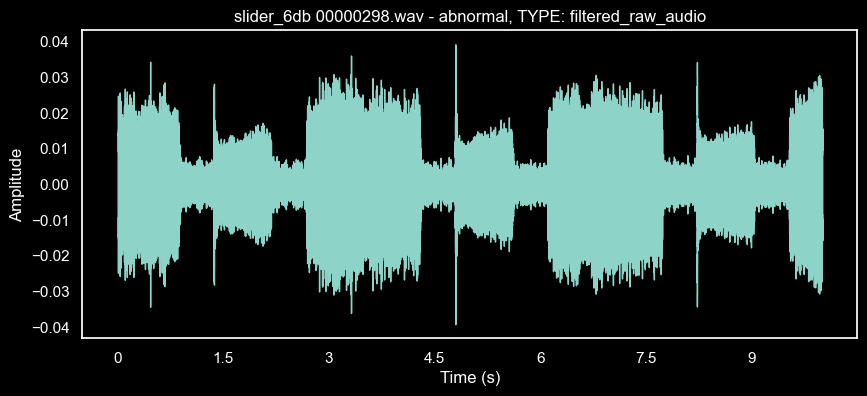

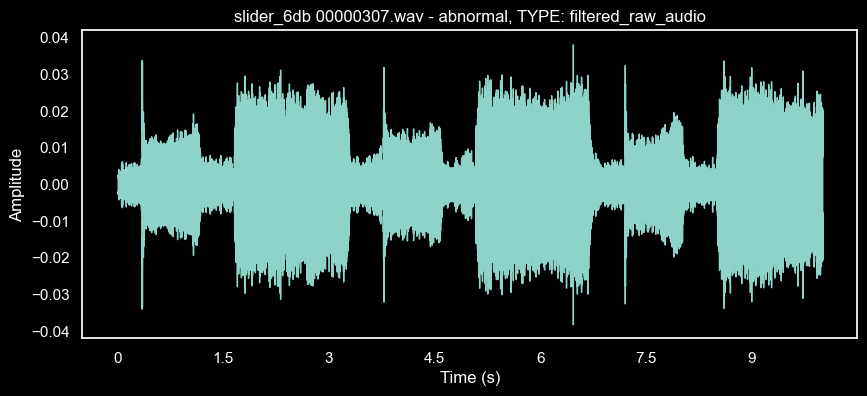

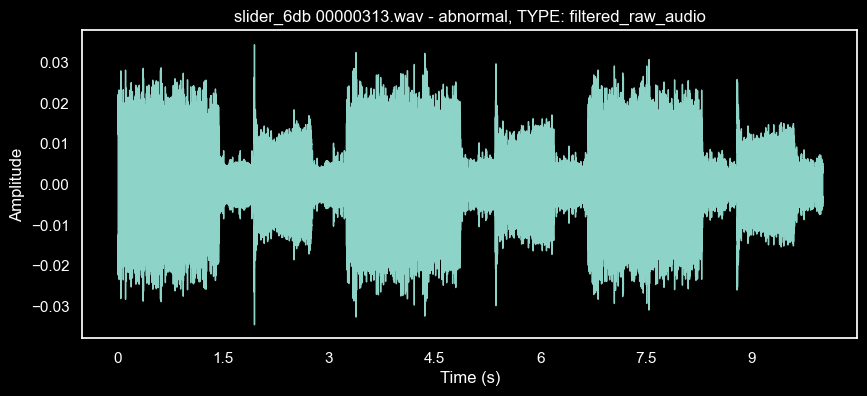

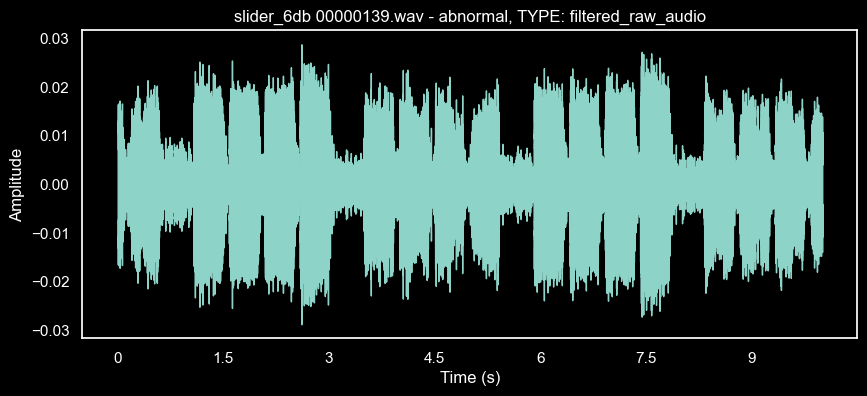

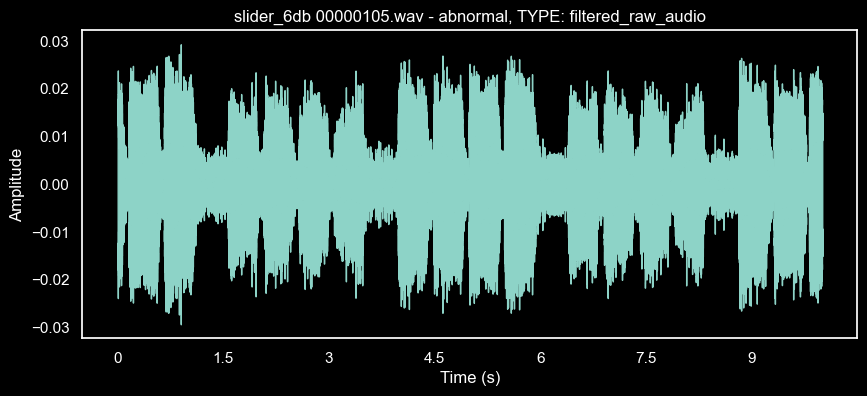

In [61]:
plot_waveforms(test_abnormal_waveform, 'filtered_raw_audio')

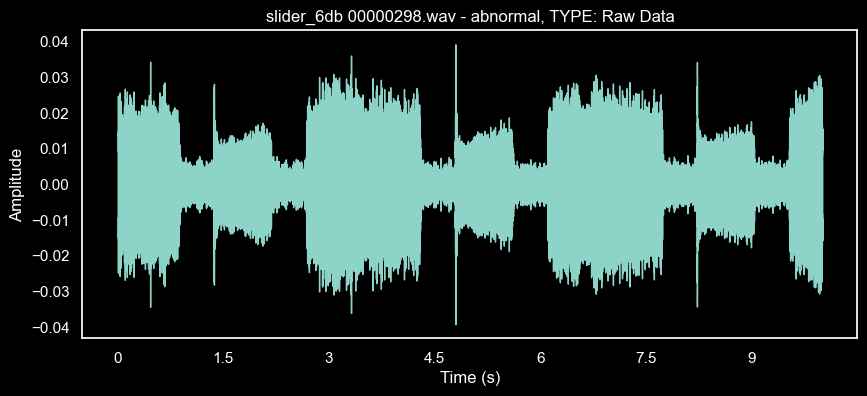

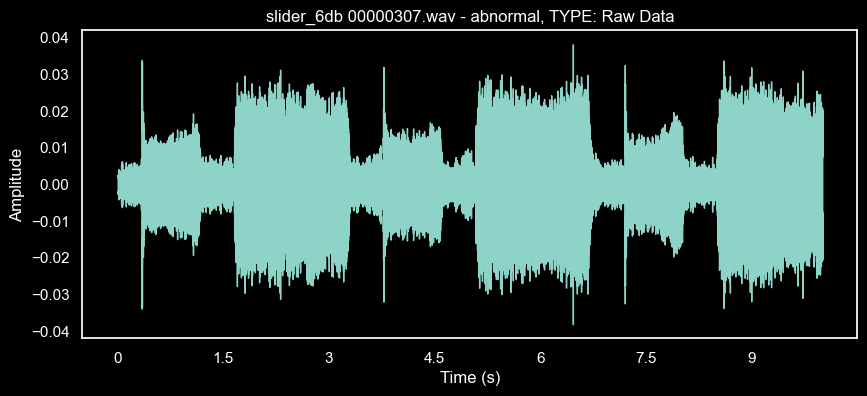

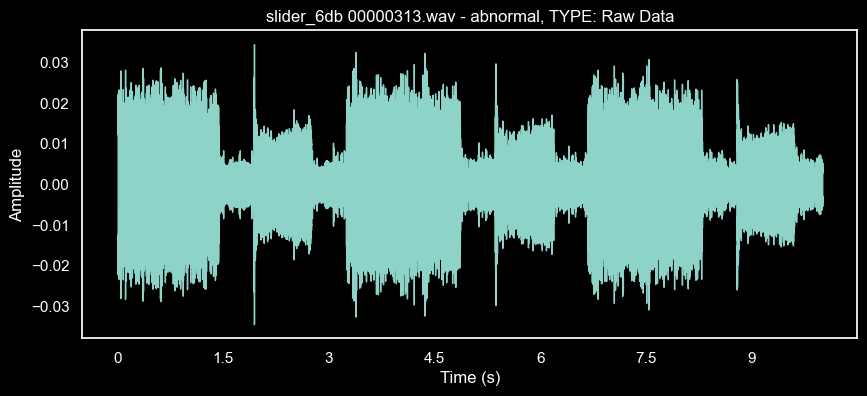

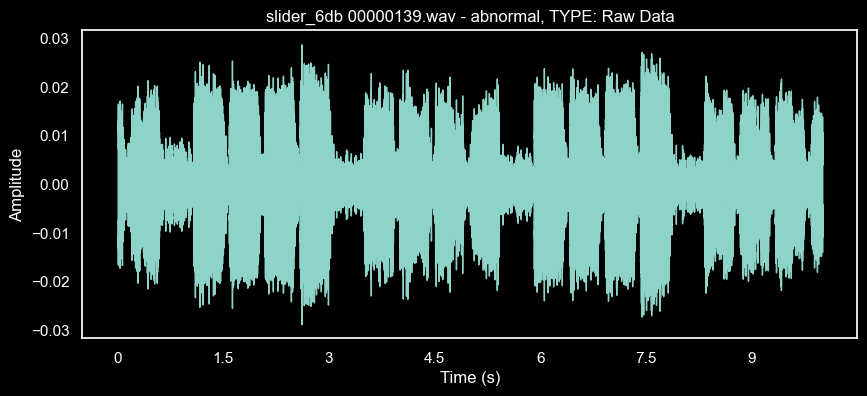

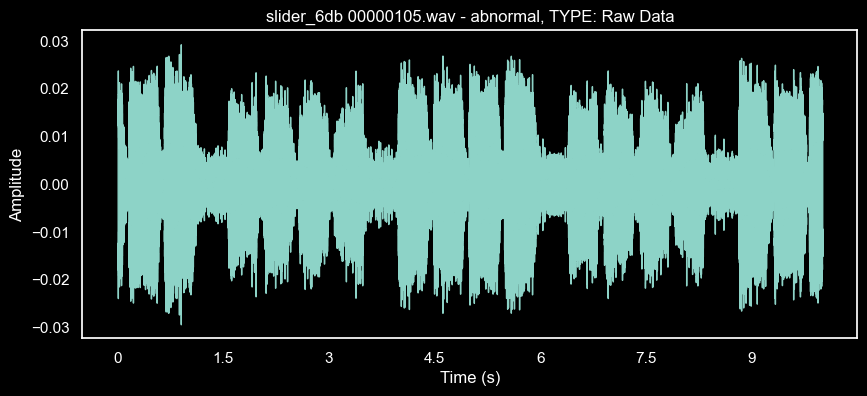

In [62]:
plot_waveforms(test_abnormal_unfiltered, 'Raw Data')

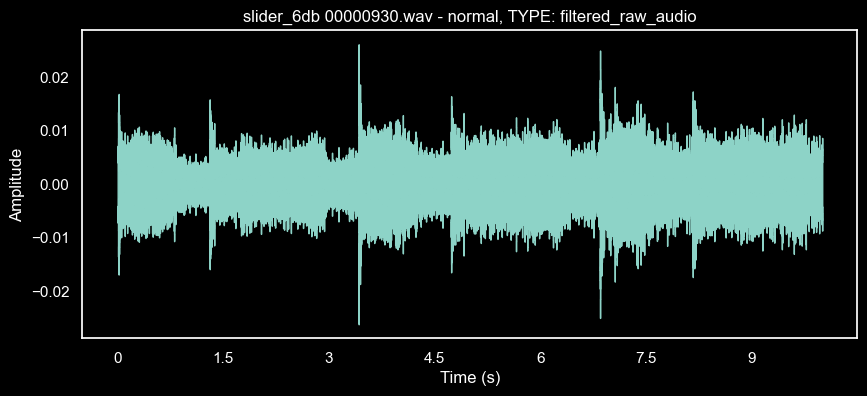

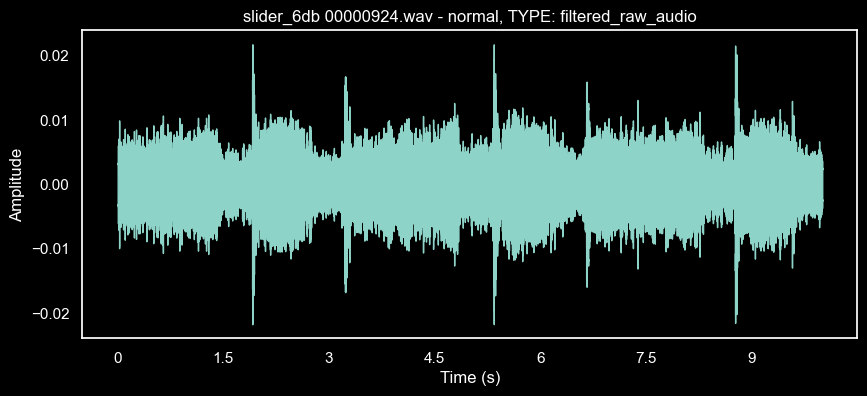

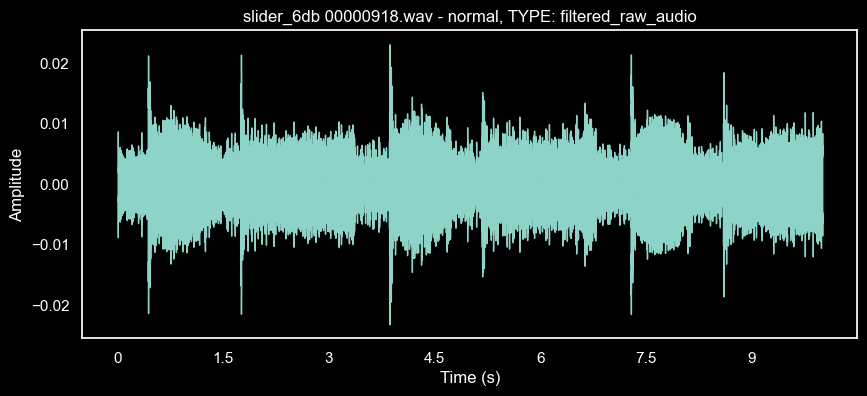

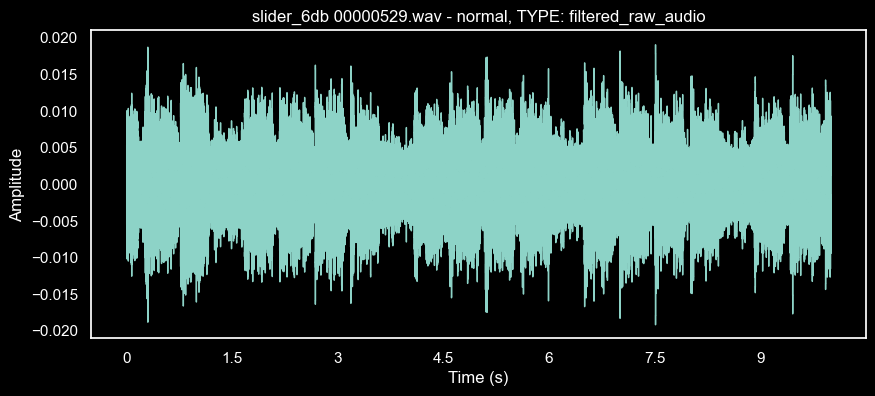

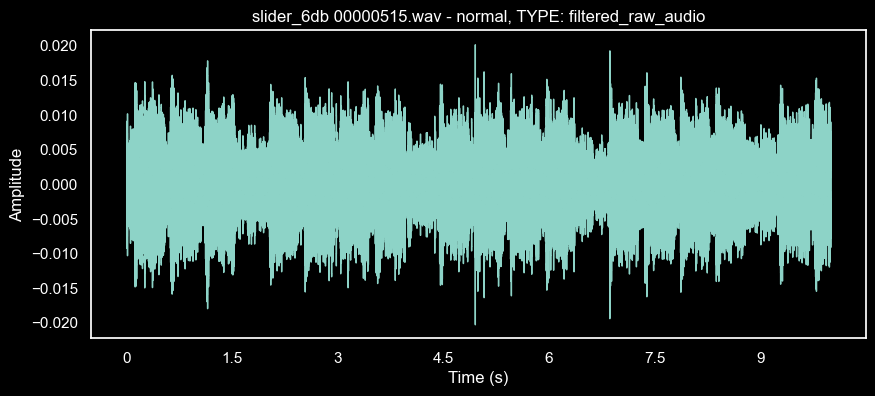

In [63]:
plot_waveforms(test_normal_waveform,'filtered_raw_audio')
# plot_waveforms(test_abnormal_waveform, 'filtered_raw_audio')

In [64]:
test_normal_unfiltered = df[(df['Classification'] == 'normal') & (df['Sound Source'] == 'slider_6db')][5:10]


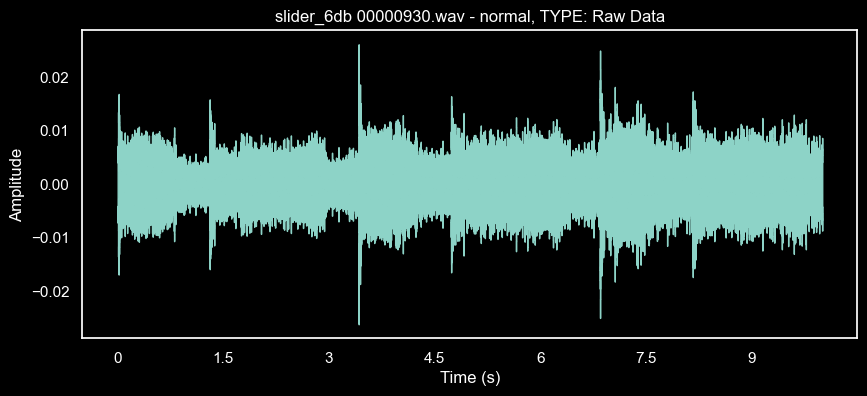

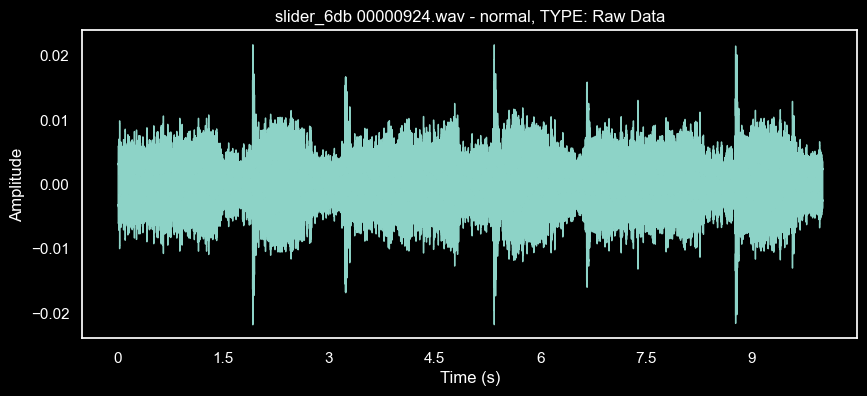

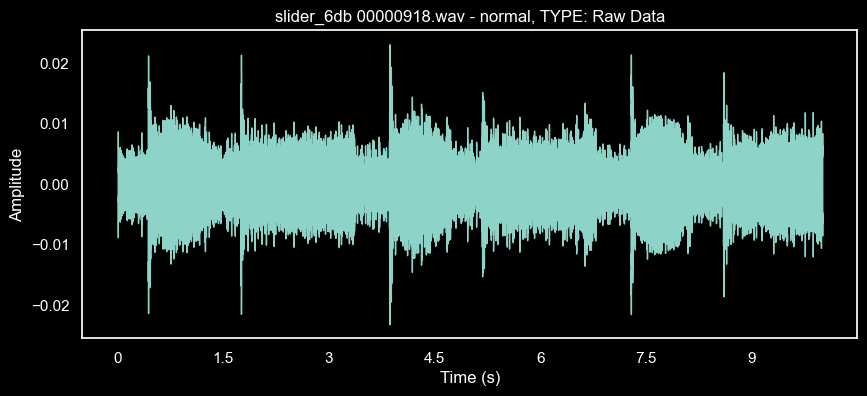

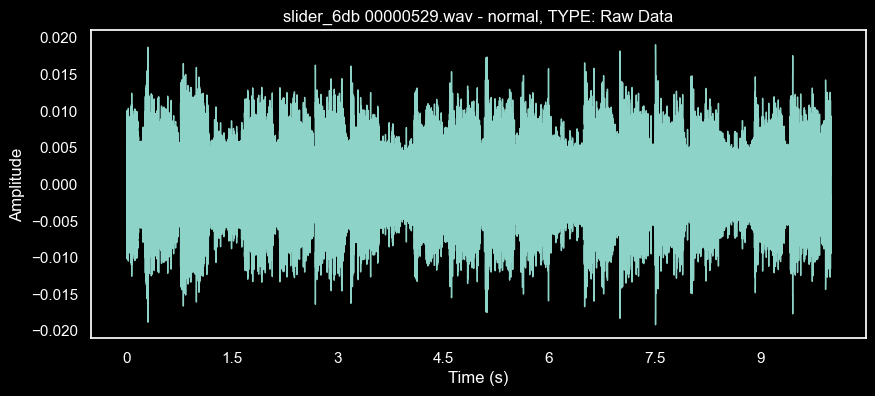

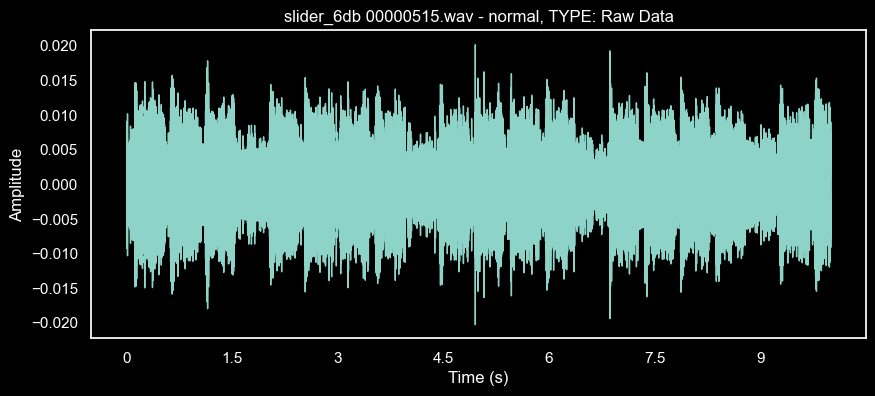

In [65]:
plot_waveforms(test_normal_unfiltered, 'Raw Data')

# Final Dataframe

## "filtered_raw_audio" is filtered audio using .010 RMS for background noise

In [66]:
filtered_df

Sound Source Machine Type Classification     .wav File  Sample Rate  \
0       slider_0db       slider       abnormal  00000059.wav        16000   
1       slider_0db       slider       abnormal  00000071.wav        16000   
2       slider_0db       slider       abnormal  00000065.wav        16000   
3       slider_0db       slider       abnormal  00000273.wav        16000   
4       slider_0db       slider       abnormal  00000267.wav        16000   
...            ...          ...            ...           ...          ...   
54052    valve_6db        valve         normal  00000083.wav        16000   
54053    valve_6db        valve         normal  00000097.wav        16000   
54054    valve_6db        valve         normal  00000068.wav        16000   
54055    valve_6db        valve         normal  00000040.wav        16000   
54056    valve_6db        valve         normal  00000054.wav        16000   

                                                Raw Data          Mean  \
0      [-0.0057907104, -0.005340576, -0.0020980835, -... -1.812935e-07   
1      [0.000869751, 0.0002822876, 0.0035362244, -0.0... -5.688906e-07   
2      [-0.0036697388, -0.0024986267, -0.002040863, -...  1.496291e-06   
3      [-0.004398346, -0.0026435852, -0.00617218, -0....  2.194882e-06   
4      [0.0011329651, 0.0014266968, 0.0013427734, 0.0...  1.301765e-06   
...                                                  ...           ...   
54052  [-0.0015220642, -0.0024032593, -0.0027389526, ... -5.024433e-07   
54053  [-0.0033035278, -0.0030288696, -0.0026435852, ... -7.680654e-07   
54054  [-0.0005912781, -1.9073486e-05, 0.00062179565,... -1.894951e-06   
54055  [-0.00061035156, -0.0008201599, -0.00074768066... -8.237124e-07   
54056  [-0.0022010803, -0.0014953613, -0.00020980835,... -7.374287e-08   

       Standard Deviation  Max Value  Min Value       RMS       ZCR  \
0                0.008589   0.034302  -0.039673  0.008589  0.096650   
1                0.008414   0.035927  -0.036274  0.008414  0.081594   
2                0.008477   0.034912  -0.036289  0.008477  0.092031   
3                0.008701   0.038101  -0.039494  0.008701  0.084450   
4                0.008667   0.035065  -0.036957  0.008667  0.083056   
...                   ...        ...        ...       ...       ...   
54052            0.002885   0.060036  -0.052261  0.002885  0.075869   
54053            0.002791   0.062965  -0.068096  0.002791  0.071919   
54054            0.002421   0.064182  -0.054520  0.002421  0.259650   
54055            0.002947   0.058903  -0.061409  0.002948  0.064181   
54056            0.002823   0.057983  -0.050571  0.002823  0.080881   

                                      filtered_raw_audio  
0      [-0.0057907104, -0.005340576, -0.0020980835, -...  
1      [0.000869751, 0.0002822876, 0.0035362244, -0.0...  
2      [-0.0036697388, -0.0024986267, -0.002040863, -...  
3      [-0.004398346, -0.0026435852, -0.00617218, -0....  
4      [0.0011329651, 0.0014266968, 0.0013427734, 0.0...  
...                                                  ...  
54052  [-0.0015220642, -0.0024032593, -0.0027389526, ...  
54053  [-0.0033035278, -0.0030288696, -0.0026435852, ...  
54054  [-0.0005912781, -1.9073486e-05, 0.00062179565,...  
54055  [-0.00061035156, -0.0008201599, -0.00074768066...  
54056  [-0.0022010803, -0.0014953613, -0.00020980835,...  

[54057 rows x 13 columns]

# Multi-class logistic regression


In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import dask.dataframe as dd



/Users/jaimacabangon/Library/Caches/pypoetry/virtualenvs/keyword-spotting-sAmOcFYZ-py3.10/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [68]:
# def normalize_audio(audio_data):
#     """Normalize the audio data to have zero mean and unit variance."""
#     mean = np.mean(audio_data)
#     std = np.std(audio_data)
#     return (audio_data - mean) / std if std > 0 else audio_data


# def process_in_batches(df, batch_size=1000):
#     """Process DataFrame in batches to avoid memory overload."""
#     num_batches = len(df) // batch_size + 1
#     processed_batches = []

#     for i in range(num_batches):
#         batch_df = df.iloc[i*batch_size:(i+1)*batch_size].copy()
#         batch_df['filtered_raw_audio'] = batch_df['filtered_raw_audio'].apply(normalize_audio)
#         processed_batches.append(batch_df)

#     return pd.concat(processed_batches, ignore_index=True)


In [69]:
# Assuming you have a DataFrame 'filtered_df' with the filtered audio data and classification
# Shuffle the DataFrame
filtered_df = filtered_df.sample(frac=1, random_state=42).reset_index(drop=True)

# # Process the DataFrame in batches
# filtered_df = process_in_batches(filtered_df)

# Split the DataFrame into features and labels
X = filtered_df['filtered_raw_audio'].tolist()
y = filtered_df['Classification']

# Perform a stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Convert the lists back to DataFrames for convenience
train_df = pd.DataFrame({'filtered_raw_audio': X_train, 'Classification': y_train})
test_df = pd.DataFrame({'filtered_raw_audio': X_test, 'Classification': y_test})


: 

: 

In [ ]:
# Split the DataFrame into features and labels
X = filtered_df['filtered_raw_audio']
y = filtered_df['Machine Type']

# Perform a stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Combine the features and labels back into DataFrames for convenience
train_df = pd.DataFrame({'filtered_raw_audio': X_train, 'Classification': y_train})
test_df = pd.DataFrame({'filtered_raw_audio': X_test, 'Classification': y_test})


In [ ]:
# Print the number of samples in each set
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(test_df)}")

# Check the distribution of the classes in the training set
print("Training set class distribution:")
print(train_df['Classification'].value_counts())

# Check the distribution of the classes in the test set
print("Test set class distribution:")
print(test_df['Classification'].value_counts())


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:



def build_model_multiclass_regression(n_classes, learning_rate=0.1):

  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model_0 = keras.Sequential()
  model_0.add(keras.layers.Flatten())
  model_0.add(keras.layers.Dense(
      units=10,
      activation='Softmax'
  ))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model_0.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model_0

In [ ]:
#Flatten + make y_train and y_test a numpy array
y_train_flatten = np.array(y_train).flatten()
y_test_flatten = np.array(y_test).flatten()

#Build model
model_0 = build_model_multiclass_regression(4, 0.01)

history = model_0.fit(
  x = x_train_normalized,
  y = y_train_flatten,
  epochs=20,
  validation_data =(x_test_normalized, y_test_flatten),
  verbose=2)

history_0 = pd.DataFrame(history.history)


In [ ]:
test_predictions = np.argmax(model_0.predict(x_test_normalized), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix

# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test_flatten, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=driver_classes, yticklabels=driver_classes, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [ ]:
# printing the model summary
model_0.summary()

In [ ]:
plt.plot(history_0['loss'])
plt.plot(history_0['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()